| Code Symbol | Math Symbol | Definition                         | Dimensions                         |
|-------------|-------------|------------------------------------|------------------------------------|
| I           | $$I$$       | Input Data, each row in an example | (numExamples, inputLayerSize)      |
| j           | $$j$$       | target data                        | (numExamples, outputLayerSize)     |
| W1          | $$W^{(1)}$$ | Layer 1 weights                    | (inputLayerSize, hiddenLayerSize)  |
| W2          | $$W^{(2)}$$ | Layer 2 weights                    | (hiddenLayerSize, outputLayerSize) |
| z2          | $$z^{(2)}$$ | Layer 2 activation                 | (numExamples, hiddenLayerSize)     |
| a2          | $$a^{(2)}$$ | Layer 2 activity                   | (numExamples, hiddenLayerSize)     |
| z3          | $$z^{(3)}$$ | Layer 3 activation                 | (numExamples, outputLayerSize)     |
| J          | $$J$$ | Cost                | (1, outputLayerSize)     |

<h3> Cost function </h3>

\begin{equation}
 J = \sum \frac{1}{2}(j-\hat{j})^2 \tag{5}\\
\end{equation}

In [1]:
%pylab inline

#Import code from last time:
from partTwo import *

Populating the interactive namespace from numpy and matplotlib


In [30]:
NN = NeuralNetwork()

In [31]:
jHat = NN.forward(I)

In [32]:
jHat

array([[ 0.30622263],
       [ 0.34698897],
       [ 0.34120151]])

In [33]:
j

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

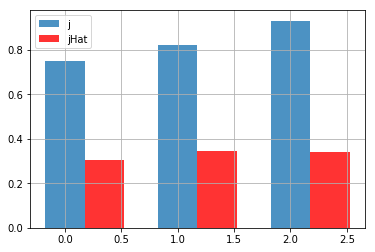

In [34]:
#Compare estimate, yHat, to actually score
bar([0,1,2], j, width = 0.35, alpha=0.8)
bar([0.35,1.35,2.35],jHat, width = 0.35, color='r', alpha=0.8)
grid(1)
legend(['j', 'jHat'])

<h3>Curse of dimensionality</h3>

<p>We explain the idea as we would explain it to a child, let's imagine the kid will like to eat pizza, and he has a shop with pizza having a different shape, a different taste, a different combination of cheese, a different price. <br>
   If the kid has to choose but only take into account one characteristic e.g the shape, then it has three circles, square, triangle, so the kid only has to try three pizzas to find what he likes most.<br>
   If the kid likes the combination of shape and taste, and there are five different taste, then he already has to choose among 3X5 different types.<br>
   If he wants the addition to take into account the combination of cheese of the cookies and there are seven different combinations then he will have to try 3X5X7 = 105 pizzas.<br>
   We could go on, but after eating all these pizzas he might already have stomach pain.... before he can make his best choice Apart from the belly-ache, it can get really difficult to remember the differences in the taste of each pizza.<br>
  As we can see things become more complicated as the number of dimensions increases, this holds for adults, for computers and also for kids.</p>
       
   

<h4>For one weight</h4>

In [35]:
import time

weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros(1000)

startTime = time.clock()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    jHat = NN.forward(I)
    costs[i] = 0.5*sum((j-jHat)**2)
    
endTime = time.clock()

In [36]:
timeElpased = endTime - startTime

In [37]:
timeElpased 

0.03030400000000011

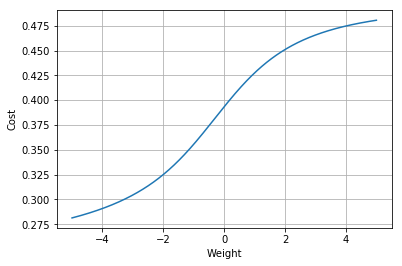

In [38]:
plot(weightsToTry, costs)
grid(1)
ylabel('Cost')
xlabel('Weight')

<h4>For two weights</h4>

In [42]:
import time

weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros((1000,1000))

startTime = time.clock()
for a in range(1000):
    for b in range(1000):
        NN.W1[0,0] = weightsToTry[a]
        NN.W1[0,1] = weightsToTry[b]       
        jHat = NN.forward(I)
        costs[a,b] = 0.5*sum((j-jHat)**2)
    
endTime = time.clock()

In [43]:
timeElpased = endTime - startTime

In [44]:
timeElpased

15.600603999999999

<h4> Nine weights </h4>

Searching through three weights would take a billion evaluations, or 11 hours! Searching through all 9 weights we need for our simple network would take 1,268,391,679,350,583.5 years.

In [48]:
0.04*(1000*(9-1))/(3600*24*365)

1.0147133434804668e-05